### Analysis performed by comparing legitimate and infected behaviours on multiple scenarios.

In [1]:
import pandas as pd
import numpy as np
import random
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data : 
Dataset generated contains data from a real IoT device that was infected by botnet malware in a laboratory. The dataset can be used to support the development of defence tools for IoT devices to identify botnets, as it contains network traffic and host-based features, such as, CPU and memory usage. The dataset and network environment files are available for the research community.
This dataset contains data collected from a real IoT device, a Raspberry Pi, which was infected by botnet malware in a controled environment. The goal of this dataset is to provide means to observe different perspectives of the operation of the device such as the use of CPU and memory and the network traffic. The collected data includes legitimate and malicious behavior.Legitimate data concerns the emulation of regular behavior of domestic IoT devices, such as surveillance cameras.
The following features were analysed: CPU usage,memory usage, electric potential difference, number of tasks running, CPU temperature.

In [2]:
data=pd.read_excel('C:/SIoT/Dataset/Bot3.xlsx')
data.head()

,volt,cpu,mem,tasks,temp,Attack_Type,Profile,class
0,1.2125,9.4,241220,173,79.5,1,MC,legit
1,1.2125,9.4,241220,173,79.5,1,MC,legit
2,1.2125,9.4,241220,173,79.5,1,MC,legit
3,1.2125,9.4,241220,173,79.5,1,MC,legit
4,1.2125,9.4,241220,173,79.5,1,MC,legit


In [3]:
data.shape

(124876, 8)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124876 entries, 0 to 124875
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   volt         124876 non-null  float64
 1   cpu          124876 non-null  float64
 2   mem          124876 non-null  int64  
 3   tasks        124876 non-null  int64  
 4   temp         124876 non-null  float64
 5   Attack_Type  124876 non-null  int64  
 6   Profile      124876 non-null  object 
 7   class        124876 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 7.6+ MB
None


In [5]:
data.isnull().sum()

volt           0
cpu            0
mem            0
tasks          0
temp           0
Attack_Type    0
Profile        0
class          0
dtype: int64

#### There are no null values

In [6]:
#Identify duplicates records in the data
dup=data.duplicated()
sum(dup)

111003

#### Removing the duplicate data and working only with unique data

In [7]:
data_unique=data.drop_duplicates()
data_unique.shape

(13873, 8)

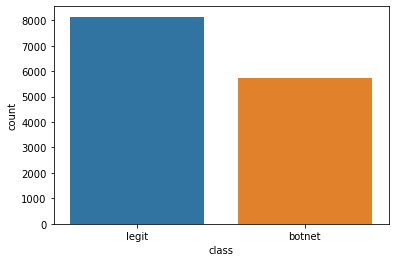

In [8]:
x=data_unique['class']
ax=sns.countplot(x=x,data=data)

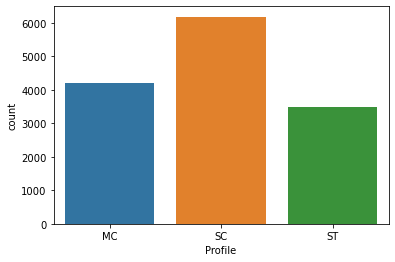

In [9]:
x=data_unique['Profile']
ax=sns.countplot(x=x,data=data)

In [10]:
profile_data=data_unique.groupby('Attack_Type')[['cpu']].count()
print(profile_data)

              cpu
Attack_Type      
1            4140
2            4869
3            4864


#### Computing average CPU usage when infected with  various botnet types for different  profiles and comparing with average without any infections

In [11]:
overall_cpu_average=data_unique['cpu'].mean()
cpu_average=data_unique.groupby(['class','Profile','Attack_Type']).agg({'cpu':['mean']})
df = pd.DataFrame(cpu_average)


In [12]:
cpu_average.columns

MultiIndex([('cpu', 'mean')],
           )

In [13]:
df.columns = df.columns.get_level_values(0)

In [14]:
df.columns


Index(['cpu'], dtype='object')

In [15]:
df


cpu
class  Profile Attack_Type           
botnet MC      1            16.892361
               2            16.896260
               3            16.898202
       SC      1             7.450495
               2             7.449787
               3             7.450495
       ST      2            11.286283
               3            11.244938
legit  MC      1            18.273353
               2            18.273353
               3            18.273353
       SC      1             6.140650
               2             6.140650
               3             6.140650
       ST      1             7.660857
               2             7.660857
               3             7.660857

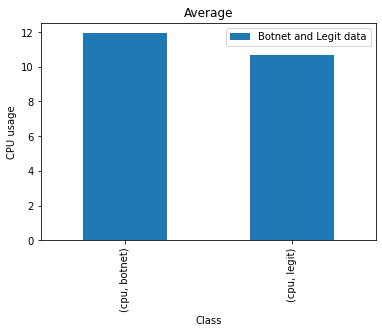

In [16]:
df.groupby(['class']).mean().unstack().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("CPU usage")
plt.title("Average")
plt.legend(["Botnet and Legit data"])
plt.show()

#### Computing average memory when infected with  various botnet types for different  profiles and comparing with average without any infections

In [17]:
overall_memory_usage=data_unique['mem'].mean()
memory_usage=data_unique.groupby(['class','Profile','Attack_Type']).agg({'mem':['mean']})
df1 = pd.DataFrame(memory_usage)

In [18]:
memory_usage.columns

MultiIndex([('mem', 'mean')],
           )

In [19]:
df1.columns = df1.columns.get_level_values(0)

In [20]:
df1

mem
class  Profile Attack_Type               
botnet MC      1            520991.844444
               2            521062.980609
               3            521103.900415
       SC      1            203688.141443
               2            203710.944681
               3            203688.141443
       ST      2            206902.962963
               3            206845.459085
legit  MC      1            323586.489019
               2            323586.489019
               3            323586.489019
       SC      1            200172.940133
               2            200172.940133
               3            200172.940133
       ST      1            217688.324963
               2            217688.324963
               3            217688.324963

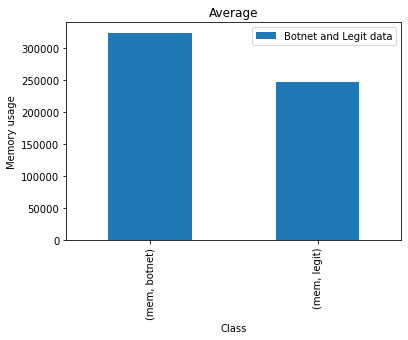

In [21]:
df1.groupby(['class']).mean().unstack().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Memory usage")
plt.title("Average")
plt.legend(["Botnet and Legit data"])
plt.show()

#### Computing average CPU temperature when infected with  various botnet types for different  profiles and comparing with average without any infections

In [22]:
overall_temp=data_unique['temp'].mean()
cpu_temp=data_unique.groupby(['class','Profile','Attack_Type']).agg({'temp':['mean']})
df2 = pd.DataFrame(cpu_temp)

In [23]:
cpu_temp.columns

MultiIndex([('temp', 'mean')],
           )

In [24]:
df2.columns = df2.columns.get_level_values(0)

In [25]:
z=df2

In [26]:
z

temp
class  Profile Attack_Type           
botnet MC      1            63.648889
               2            63.641413
               3            63.636515
       SC      1            52.947949
               2            52.946525
               3            52.947949
       ST      2            54.264472
               3            54.280583
legit  MC      1            65.623280
               2            65.623280
               3            65.623280
       SC      1            50.941685
               2            50.941685
               3            50.941685
       ST      1            52.988774
               2            52.988774
               3            52.988774

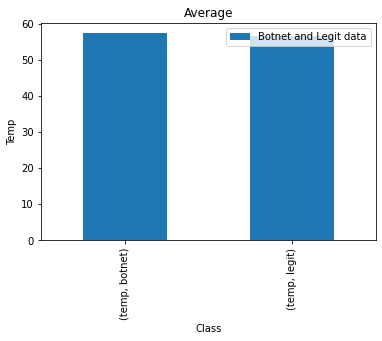

In [27]:
df2.groupby(['class']).mean().unstack().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Temp")
plt.title("Average")
plt.legend(["Botnet and Legit data"])
plt.show()

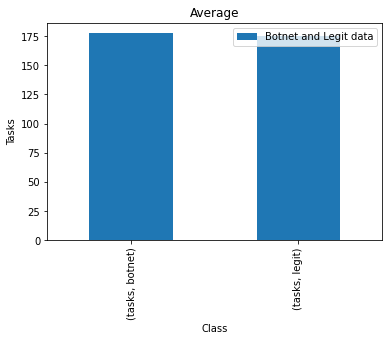

In [28]:
nof_tasks_total=data_unique['tasks'].mean()
nof_tasks=data_unique.groupby(['class','Profile','Attack_Type']).agg({'tasks':['mean']})
df3 = pd.DataFrame(nof_tasks)
df3.columns
df3.columns = df3.columns.get_level_values(0)
df3.groupby(['class']).mean().unstack().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Tasks")
plt.title("Average")
plt.legend(["Botnet and Legit data"])
plt.show()

#### Overall Analysis
For Type 1 infections, which consist of the combinations Hajime/MC-profile the averages computed for the infected period were higher than those of the period without infections It shows that Hajime’s actions caused a variation in multiple features, which could facilitate its detection based on host data analysis For the infection based on Aidra, the device presented a lower memory usage when compared to the period without infections. The decrease in memory usage is a consequence of the way Aidra works since it stops other processes running on the device to gather more resources for itself. The behaviour of Bashlite was similar to Aidra. It is important to observe that each botnet can cause different changes in the features behaviour. Intuitively, the presence of malware on a device was suppose to result in an increase in all observed features. However, it is possible to see that Aidra and Bashlite caused a decrease in memory usage, contradicting this intuition.Type 3 infections, the Raspberry Pi was compromised with Mirai, Doflo, Tsunami, and Wroba malware simultaneously. This was done to observe the behaviour of botnets when competing for resources. As expected, all profiles showed higher averages for most features, due to the high amount of malware processes running on the device.

In [29]:
X=data_unique.iloc[:, [1,2]].values

In [30]:
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
print(kmeans.cluster_centers_)

[0 0 0 ... 0 0 0]
[[9.61908046e+00 2.22668103e+05]
 [1.65074267e+01 5.05945949e+05]
 [1.87659864e+01 4.34746354e+05]
 [8.19275862e+00 2.00802185e+05]
 [1.82289216e+01 5.99029510e+05]
 [1.71052632e+01 3.41908842e+05]]


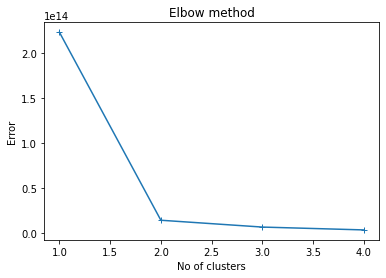

In [31]:
Error =[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 5), Error, marker='+')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

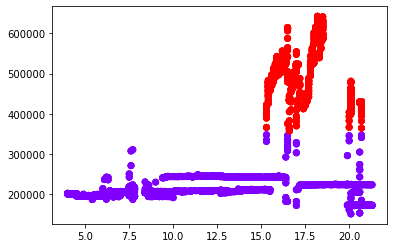

In [32]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')
plt.show()

# IP flow data

Read data

In [609]:
IP_data=pd.read_csv('C:/SIoT/Dataset/MC_I3n.csv')


In [610]:
IP_data.isnull().sum()


ts        0
te        0
td        0
sa        0
da        0
sp        0
dp        0
pr        0
flg       0
fwd       0
stos      0
ipkt      0
ibyt      0
opkt      0
obyt      0
in        0
out       0
sas       0
das       0
smk       0
dmk       0
dtos      0
dir       0
nh        0
nhb       0
svln      0
dvln      0
ismc      0
odmc      0
idmc      0
osmc      0
mpls1     0
mpls2     0
mpls3     0
mpls4     0
mpls5     0
mpls6     0
mpls7     0
mpls8     0
mpls9     0
mpls10    0
cl        0
sl        0
al        0
ra        0
eng       0
exid      0
tr        0
Label     0
dtype: int64

# No Null values , finding duplicate values 

In [611]:
dup=IP_data.duplicated()
sum(dup)

907

# Dropping the duplicate values 

In [612]:
IP_data=IP_data.drop_duplicates()
IP_data.shape

(478617, 49)

# Dropping the coulmns with zero values 

In [613]:
IP_data=IP_data.replace(0,np.nan).dropna(axis=1,how="all")

In [614]:
print(IP_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478617 entries, 0 to 479523
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      478617 non-null  object 
 1   te      478617 non-null  object 
 2   td      118008 non-null  float64
 3   sa      478617 non-null  object 
 4   da      478617 non-null  object 
 5   sp      467456 non-null  float64
 6   dp      478472 non-null  float64
 7   pr      478617 non-null  object 
 8   flg     478617 non-null  object 
 9   ipkt    478617 non-null  int64  
 10  ibyt    478617 non-null  int64  
 11  nh      478617 non-null  object 
 12  nhb     478617 non-null  object 
 13  ismc    478617 non-null  object 
 14  odmc    478617 non-null  object 
 15  idmc    478617 non-null  object 
 16  osmc    478617 non-null  object 
 17  mpls1   478617 non-null  object 
 18  mpls2   478617 non-null  object 
 19  mpls3   478617 non-null  object 
 20  mpls4   478617 non-null  object 
 21  mpls5   47

In [615]:
IP_data.head()


,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,mpls6,mpls7,mpls8,mpls9,mpls10,ra,eng,exid,tr,Label
0,12-11-2018 04:25,12-11-2018 04:27,117.65,124.85.49.80,192.168.1.109,443.0,46286.0,TCP,.AP...,19938,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0.0.0,0/0,1,00:00.0,1
1,12-11-2018 04:25,12-11-2018 04:27,117.65,192.168.1.109,124.85.49.80,46286.0,443.0,TCP,.AP..F,9944,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0.0.0,0/0,1,00:00.0,1
2,12-11-2018 04:25,12-11-2018 04:29,255253.00,100.77.1.153,192.168.1.109,443.0,54308.0,TCP,.AP..F,8,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0.0.0,0/0,1,00:00.0,1
3,12-11-2018 04:25,12-11-2018 04:29,255253.00,192.168.1.109,100.77.1.153,54308.0,443.0,TCP,.A.R.F,9,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0.0.0,0/0,1,00:00.0,1
4,12-11-2018 04:25,12-11-2018 04:25,1538.00,148.49.31.216,192.168.1.109,443.0,43240.0,TCP,.A...F,2,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0.0.0,0/0,1,00:00.0,1


# Dropping the features that do not contribute to the analysis

In [616]:
IP_data=IP_data.drop(['ts', 'te','sa','da','flg','ra','exid'], axis = 1)


In [617]:
print(IP_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478617 entries, 0 to 479523
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   td      118008 non-null  float64
 1   sp      467456 non-null  float64
 2   dp      478472 non-null  float64
 3   pr      478617 non-null  object 
 4   ipkt    478617 non-null  int64  
 5   ibyt    478617 non-null  int64  
 6   nh      478617 non-null  object 
 7   nhb     478617 non-null  object 
 8   ismc    478617 non-null  object 
 9   odmc    478617 non-null  object 
 10  idmc    478617 non-null  object 
 11  osmc    478617 non-null  object 
 12  mpls1   478617 non-null  object 
 13  mpls2   478617 non-null  object 
 14  mpls3   478617 non-null  object 
 15  mpls4   478617 non-null  object 
 16  mpls5   478617 non-null  object 
 17  mpls6   478617 non-null  object 
 18  mpls7   478617 non-null  object 
 19  mpls8   478617 non-null  object 
 20  mpls9   478617 non-null  object 
 21  mpls10  47

# # Data analysis with time duration and packet size

In [620]:
IP_data.groupby(['Label'])[['td','ibyt']].describe().transpose

<bound method DataFrame.transpose of              td                                                           \
          count          mean            std   min  25%     50%      75%   
Label                                                                      
-1     116577.0   3144.697607   14521.790863  0.01  7.2  423.00   7181.0   
 1       1431.0  42784.713215  172917.505196  0.01  5.0  100.38  25674.0   

                      ibyt                                                  \
             max     count           mean           std   min   25%    50%   
Label                                                                        
-1     3084452.0  477064.0     140.215101  1.131605e+04  20.0  40.0   40.0   
 1     3517244.0    1553.0  819286.326465  6.204508e+06  32.0  83.0  514.0   

                            
          75%          max  
Label                       
-1       40.0    7802917.0  
 1     4773.0  141952769.0  >

# Analysis for protocol  parameter: 

Distributions of protocol highly vary for normal and botnet IoT traffc. In normal IoT traffic, protocol distributions are much more closely related to UDP and TCP.There is huge difference when IoT devices are victimized by the botnet

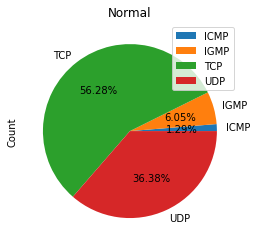

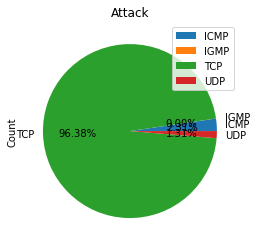

In [44]:
count_series = IP_data.groupby(['Label', 'pr']).size().reset_index(name = "Count")

f1= pd.DataFrame(count_series)
#f1['Label'] = f1['Label'].astype(str)
f1.set_index("pr",inplace=True)
f1[f1.Label==1].plot.pie(y="Count",title="Normal",autopct='%1.2f%%')
plt.legend(loc="upper right")
plt.show()
f1[f1.Label==-1].plot.pie(y="Count",title="Attack",autopct='%1.2f%%')
plt.legend(loc="upper right")
plt.show()

In [45]:
data_encoded = IP_data.select_dtypes(exclude=['object'])
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478629 entries, 0 to 479523
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   td      118008 non-null  float64
 1   sp      467456 non-null  float64
 2   dp      478484 non-null  float64
 3   ipkt    478629 non-null  float64
 4   ibyt    478629 non-null  float64
 5   Label   478629 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 25.6 MB
None


# Analysis of Time duration versus class  (Normal and Attack data)

C:\Users\Sheetal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


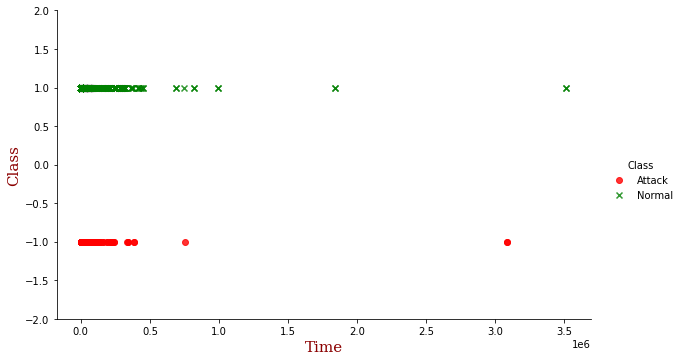

In [46]:
import seaborn as sns
g=sns.lmplot('td', 'Label', data_encoded, hue='Label', markers=["o", "x"],fit_reg=False,palette=['red','green'])
plt.ylim([-2, 2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
new_title = 'Class'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Attack', 'Normal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
font1 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Time",fontdict = font1)
plt.ylabel("Class",fontdict = font1)
plt.show()



Inference: Normal IoT traffic has certain time-limit limitations.IoT gadgets send packets at regular time intervals while in the attack (e.g. botnet), and IoT devices send packets frequently around zero nanoseconds so the most extreme number of requests can be sent inside a timeframe.In correlation, normal tra±c periods are a lot higher than attack IoT
traffic, and the majority of the attack has happened inside zero nanoseconds .Time duration  can be a  feature for separating the normal and botnet IoT traffic

# Analysis of packet size versus class (Normal and Attack data)

C:\Users\Sheetal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


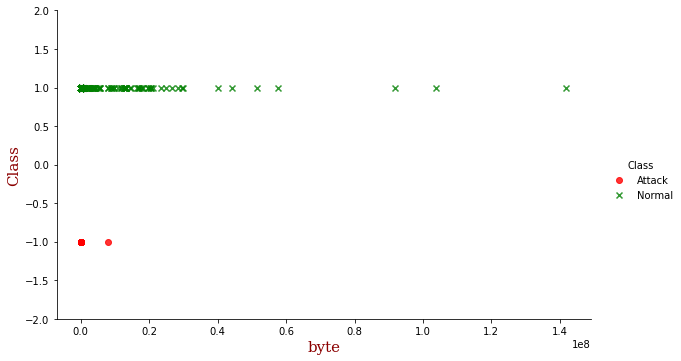

In [47]:
g=sns.lmplot('ibyt', 'Label', data_encoded, hue='Label', markers=["o", "x"],fit_reg=False,palette=['red','green'])
plt.ylim([-2, 2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
new_title = 'Class'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Attack', 'Normal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("byte",fontdict = font2)
plt.ylabel("Class",fontdict = font2)
plt.show()

Inference: There are critical contrasts in the data packet size among normal and botnet IoT traffic.The botnet traffic has a small packet in size so it can attempt to open as many requests as possible with victim IoT devices to exhaust resources

# Analysis of source port  versus class (Normal and Attack data)

C:\Users\Sheetal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


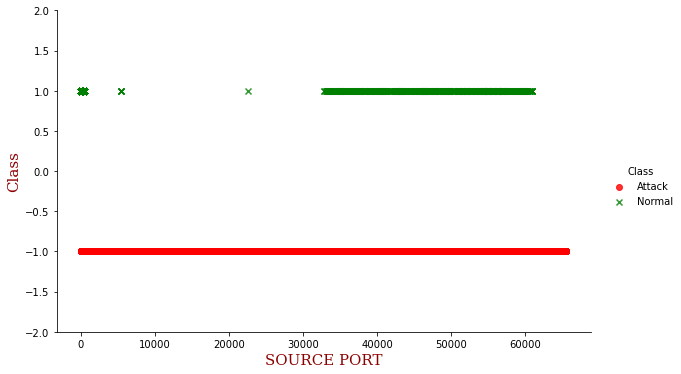

In [48]:
g=sns.lmplot('sp', 'Label', data_encoded, hue='Label', markers=["o", "x"],fit_reg=False,palette=['red','green'])
plt.ylim([-2, 2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
new_title = 'Class'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Attack', 'Normal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("SOURCE PORT",fontdict = font2)
plt.ylabel("Class",fontdict = font2)
plt.show()

Inference:Source port number is a number for correspondence that is related to the beginning applications on the local host. IoT gadgets have some predetermined numbers of communications. Generally, normal tra±c changes less source ports; however, malicious
or botnet tra±c changes lots of source ports with the goal that it can send its activities from the di®erent gadgets and can utilize IoT resources . The more changes the number of source ports, the greater is the likelihood of the malicious attack on IoT devices.

# Analysis of destination  port  versus class (Normal and Attack data)

C:\Users\Sheetal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


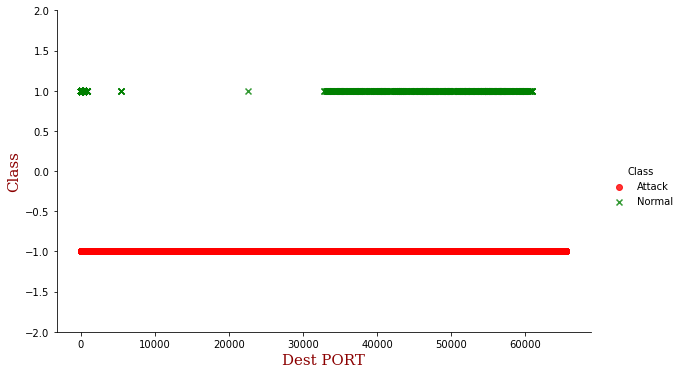

In [49]:
g=sns.lmplot('dp', 'Label', data_encoded, hue='Label', markers=["o", "x"],fit_reg=False,palette=['red','green'])
plt.ylim([-2, 2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
new_title = 'Class'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Attack', 'Normal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Dest PORT",fontdict = font2)
plt.ylabel("Class",fontdict = font2)
plt.show()

Infernece:The destination port number is the number for this correspondence related to the destination application on the remote host. IoT devices have some short communication with other devices, that is why its destination ports are less in number and rarely change . However, botnet regularly changes its destination to keep the IoT devices busy. It is a significant characteristic for the botnet related to IoT traffic.

C:\Users\Sheetal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


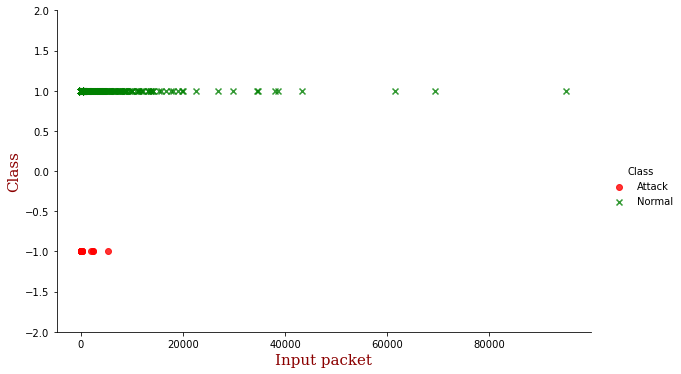

In [50]:
g=sns.lmplot('ipkt', 'Label', data_encoded, hue='Label', markers=["o", "x"],fit_reg=False,palette=['red','green'])
plt.ylim([-2, 2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
new_title = 'Class'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Attack', 'Normal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Input packet",fontdict = font2)
plt.ylabel("Class",fontdict = font2)
plt.show()

In [51]:
data_encoded.head()

,td,sp,dp,ipkt,ibyt,Label
0,117.65,443.0,46286.0,19938.0,29744872.0,1
1,117.65,46286.0,443.0,9944.0,616449.0,1
2,255253.00,443.0,54308.0,8.0,447.0,1
3,255253.00,54308.0,443.0,9.0,444.0,1
4,1538.00,443.0,43240.0,2.0,104.0,1


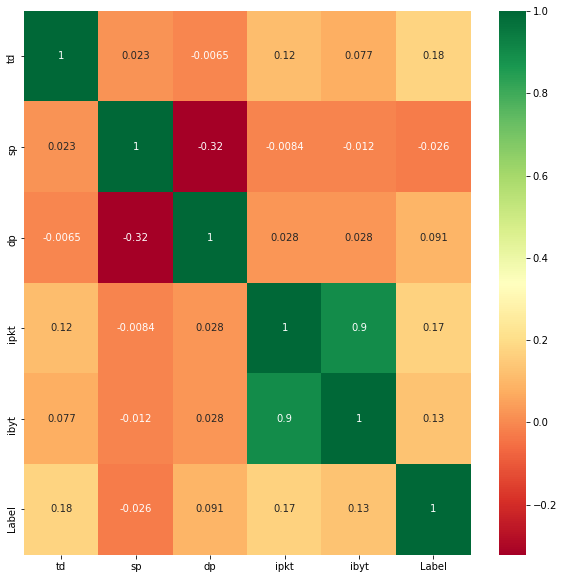

In [52]:
X = data_encoded.iloc[:,0:5]  #independent columns
y = data_encoded.iloc[:,-1]    #target column 
#get correlations of each features in dataset
corrmat = data_encoded.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [53]:
data_encoded.describe()

,td,sp,dp,ipkt,ibyt,Label
count,1.180080e+05,467456.000000,478484.000000,478629.000000,4.786290e+05,478629.000000
mean,3.625384e+03,32866.876906,3452.906916,4.604978,2.798084e+03,-0.993511
std,2.427921e+04,19667.573988,11996.154121,267.727323,3.565455e+05,0.113739
min,1.000000e-02,1.000000,1.000000,1.000000,2.000000e+01,-1.000000
25%,7.200000e+00,15678.000000,23.000000,1.000000,4.000000e+01,-1.000000
50%,4.150000e+02,35561.000000,23.000000,1.000000,4.000000e+01,-1.000000
75%,7.181000e+03,49617.000000,81.000000,1.000000,4.000000e+01,-1.000000
max,3.517244e+06,65535.000000,65535.000000,95063.000000,1.419528e+08,1.000000


### Anamoly Detection using  One Class SVM and Local Outlier Factor 

In [655]:
ip_data=pd.read_csv('C:/SIoT/Dataset/SC_L.csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [656]:
ip_data.shape

(4904, 49)

Taking only the relevant features based on correlations of each features in dataset.

In [657]:
relevant_features = [  
    "td",
    "ibyt",
    "ipkt",
    "Label" ]

Transforming the dataframe to contain only relevant features

In [658]:
ip_data = ip_data[relevant_features]

Normalise the ip_data - which leads to better accuracy and reduces numerical instability.

In [659]:
ip_data["td"] = np.log((ip_data["td"] + 0.1).astype(float))  
ip_data["ibyt"] = np.log((ip_data["ibyt"] + 0.1).astype(float))  
ip_data["ipkt"] = np.log((ip_data["ipkt"] + 0.1).astype(float))  

In [660]:
ip_data.loc[ip_data['Label'] == 0, "traffic_behaviour"] = 1  
ip_data.loc[ip_data['Label'] != 0, "traffic_behaviour"] = -1

setting traffic_behaviour value as the target for training and testing.

In [661]:
target = ip_data['traffic_behaviour']

Finding  the proportion of outliers 

In [662]:
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (417,)
outlier fraction 0.0850326264274062


The main difference of one class svm from a standard SVM is that it is fit in an unsupervised manner, hence dropping the label and traffic behavior columns

In [663]:
ip_data.drop(["Label", "traffic_behaviour"], axis=1, inplace=True)

In [664]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(ip_data,target,test_size=0.2, train_size=0.8)  
train_data.shape 

(3923, 3)

In [665]:
from sklearn import svm
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

nu 0.0850326264274062


In [666]:
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
model.fit(train_data) 

OneClassSVM(gamma=5e-05, nu=0.0850326264274062)

In [667]:
from sklearn import metrics  
preds_train = model.predict(train_data)  
targs_train = train_target


In [668]:
preds_train.size
targs_train.size

3923

In [669]:
print("accuracy: ", metrics.accuracy_score(targs_train, preds_train))  
print("precision: ", metrics.precision_score(targs_train, preds_train))  
print("recall: ", metrics.recall_score(targs_train, preds_train))  
print("f1: ", metrics.f1_score(targs_train, preds_train))  
print("area under curve (auc): ", metrics.roc_auc_score(targs_train, preds_train))


accuracy:  0.8241141983176141
precision:  0.9040290990486849
recall:  0.903018446059251
f1:  0.9035234899328858
area under curve (auc):  0.45440777375426317


In [670]:
preds = model.predict(test_data)  
targs = test_target

In [671]:
print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds)) 

accuracy:  0.8226299694189603
precision:  0.9190421892816419
recall:  0.8866886688668867
f1:  0.9025755879059351
area under curve (auc):  0.45028877887788776


### Outlier detection with Local Outlier Factor (LOF)

Lof is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

In [591]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

In [592]:
new_data=pd.read_csv('C:/SIoT/Dataset/SC_L.csv')

In [593]:
new_data.groupby('Label').size()

Label
0    4487
1     417
dtype: int64

In [594]:
relevant_features = [  
    "td",
    "ibyt",
    "ipkt",
    "Label" ]

In [595]:
new_data = new_data[relevant_features]

In [596]:
new_data["td"] = np.log((new_data["td"] + 0.1).astype(float))  
new_data["ibyt"] = np.log((new_data["ibyt"] + 0.1).astype(float))  
new_data["ipkt"] = np.log((new_data["ipkt"] + 0.1).astype(float))

In [597]:
new_data.loc[new_data['Label'] == 0, "traffic_behaviour"] = 1  
new_data.loc[new_data['Label'] != 0, "traffic_behaviour"] = -1

In [598]:
new_data.drop(["Label"], axis=1, inplace=True)

 retrieve the array

In [599]:
data = new_data.values

split into input and output elements

In [600]:
X, y = data[:, :-1], data[:, -1]

split into train and test sets

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [602]:
print(X_train.shape, y_train.shape)

(3432, 3) (3432,)


identify outliers in the training dataset

In [603]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

select all rows that are not outliers

In [604]:
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [605]:
print(X_train.shape, y_train.shape)

(3117, 3) (3117,)


In [606]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit the model
model.fit(X_train, y_train)

LinearRegression()

evaluate the model

In [608]:
yhat = model.predict(X_test)

evaluate predictions

In [554]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.311



#### OSVM, LOF algortihms have been trained in network-based data, including time duration, input packet size, number of bytes .Results from the botnet dataset suggest that the ML models have achieved accuracy of 80% and mean absolute error of 0.311.